In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Численное решение дифференциальных уравнений

### Метод Эйлера (частный случай формулы Рунге-Кутта)
$$ y'=f(x,y) $$ 
$$ y_{i+1}=y_i+h \cdot f(x_i,y_i) $$ 
$$ h=\frac{b-a}{n} $$ 

In [3]:
def euler(a, b, func, n, y_init):
    args = np.linspace(a, b, n)
    vals = [0] * n
    vals[0] = y_init
    h = abs(b - a) / n
    for i in range(n - 1):
        vals[i + 1] = vals[i] + func(args[i], vals[i]) * h
    
    return args, vals

### Метод Рунге-Кутта
$$ y'=f(x,y) $$ 
$$ y_{i+1}=y_i+\frac{h}{6} (k_1+2k_2+2k_3+k_4) $$ 
$$ k_1=f(x_i,y_i) \cdot h $$ 
$$ k_2=f(x_i+\frac{h}{2},y_i+\frac{k_1}{2}) \cdot h $$ 
$$ k_3=f(x_i+\frac{h}{2},y_i+\frac{k_2}{2}) \cdot h $$ 
$$ k_4=f(x_i+h,y_i+k_3) \cdot h $$ 
$$ h=\frac{b-a}{n} $$ 
В методе Рунге-Кутта мы воспользуемся
$$ y_{i+1}=y_i+f(x_i+\frac{h}{2},y_i+\frac{k_1}{2}) \cdot h $$ 

In [4]:
def runge(a, b, func, n, y_init):
    args = np.linspace(a, b, n)
    vals = [0] * n
    vals[0] = y_init
    h = abs(b - a) / n
    for i in range(n - 1):
        k = func(args[i], vals[i]) * h
        vals[i + 1] = vals[i] + func(args[i] + h / 2, vals[i] + k / 2) * h
    
    return args, vals

#### Задача 1.
$$ y'=y+x $$ 
$$ y(0)=0 $$ 
$$ x \in [0,2] $$ 

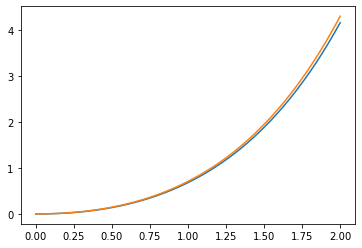

In [5]:
def func_1(x, y):
    return y + x


args_1, vals_1 = euler(0, 2, func_1, 100, 0)
args_2, vals_2 = runge(0, 2, func_1, 100, 0)

plt.plot(args_1, vals_1)
plt.plot(args_2, vals_2)
plt.show()

#### Задача 2.
$$ y'=y-\frac{2x}{y} $$ 
$$ y(0)=1 $$ 
$$ x \in [0,40] $$ 

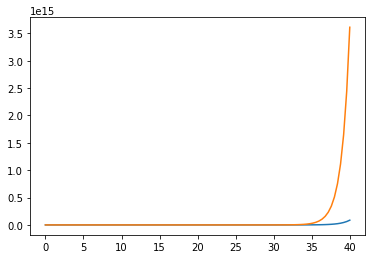

In [6]:
def func_2(x, y):
    return y - 2 * x / y


args_1, vals_1 = euler(0, 40, func_2, 100, 1)
args_2, vals_2 = runge(0, 40, func_2, 100, 1)

plt.plot(args_1, vals_1)
plt.plot(args_2, vals_2)
plt.show()

#### Задача 3.
$$ y'=x^2-2y $$ 
$$ y(0)=1 $$ 
$$ x \in [0,10] $$ 

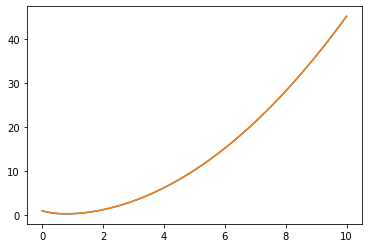

In [7]:
def func_3(x, y):
    return x ** 2 - 2 * y


args_1, vals_1 = euler(0, 10, func_3, 100, 1)
args_2, vals_2 = runge(0, 10, func_3, 100, 1)

plt.plot(args_1, vals_1)
plt.plot(args_2, vals_2)
plt.show()

### Метод Рунге-Кутта второго порядка
$$ y'=f(x,y) $$ 
$$ y(x_{0})=y_{0} $$ 
$$ {\Large y_{i+1}=y_{i}+C_{1} \cdot k_{1_{i}} + C_{2} \cdot k_{2_{i}} } $$ 
$$ k_{1_{i}}=f(x_{i-1},y_{i-1}) \cdot h $$ 
$$ k_{2_{i}}=f(x_{i-1}+ \alpha_{2} \cdot h,y_{i-1}+ \beta_{21} \cdot k_{1_{i}}) \cdot h $$ 
$$ C_{1}+C_{2}=1 \Rightarrow C_{1}=1-C_{2} $$ 
$$ \alpha_{2}=\beta_{21}=\frac{1}{2 \cdot C_{2}} $$ 

In [8]:
def runge_kutta(a, b, func, n, y_init, c_2):
    c_1 = 1 - c_2
    alpha = beta = 1 / (2 * c_2)
    h = abs(b - a) / n

    x = [0] * n
    y = [0] * n
    x[0] = a
    y[0] = y_init

    for i in range(1, n):
        k_1 = func(x[i - 1], y[i - 1]) * h
        k_2 = func(x[i - 1] + alpha * h, y[i - 1] + beta * k_1) * h
        x[i] = x[i - 1] + h
        y[i] = y[i - 1] + c_1 * k_1 + c_2 * k_2

    return x, y

#### Функция потерь
$$ loss= \sum_{i=1}^{n} ({y_{i}}^{*} - y_{i})^{2} $$ 

In [9]:
def loss(actual_y, test_y):
    s = 0
    for i, j in zip(actual_y, test_y):
        s += (i - j) ** 2
    return s

#### Задача 4.
$$ y'=y-\frac{2x}{y} $$ 
$$ y(0)=1 $$ 
$$ x \in [0, 10] $$ 
$$ n=100 $$ 
Актуальная функция:
$$ y=\sqrt{2x+1} $$ 

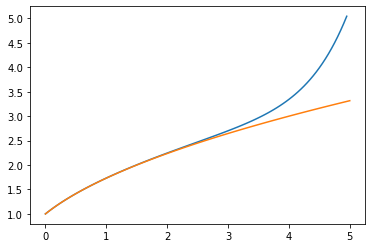

Функция потерь для c_2=0.5: 19.20977367649852


In [10]:
def func_4(x, y):
    return y - 2 * x / y


x, y = runge_kutta(a=0, b=5, func=func_4, y_init=1, n=100, c_2=0.5)

actual_x = np.linspace(0, 5, 100)
actual_y = [np.sqrt(2 * i + 1) for i in actual_x]

plt.plot(x, y)
plt.plot(actual_x, actual_y)
plt.show()

print('Функция потерь для c_2=0.5:', loss(actual_y, y))